In [17]:
from TABprocessor import *
import gensim 
from gensim.models import Word2Vec 
import sklearn
from sklearn import manifold
import matplotlib.pyplot as plt

import tensorflow 
from tensorflow import keras

import sklearn
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split 

import matplotlib.pyplot as plt
import numpy as np
import os
# # import tensorflow as tf
# # from tensorflow import keras 
# #设置50%的显存限制
# tf_config = tf.compat.v1.ConfigProto()  
# tf_config.gpu_options.per_process_gpu_memory_fraction = 0.7 # 分配50%  
# session = tf.compat.v1.Session(config=tf_config)

In [2]:
def train_w2v(total_measures, epochs=10, min_count=0, workers=2, vector_size=64, window=10):
    w2v_model = Word2Vec(total_measures, min_count=min_count, workers=workers, vector_size=vector_size, window=window)
    w2v_model.train(total_measures, total_examples=w2v_model.corpus_count, epochs=epochs)
    count = 0
    for measure in total_measures:
        count += len(measure)

    print('共有音{}个'.format(count))
    print('词袋大小：{}个词'.format(len(w2v_model.wv)))
    return w2v_model

def pca_fig(model):
    all_words = model.wv.index_to_key
    all_vectors = []
    for word in all_words:
        all_vectors.append(model.wv[word])

    tsne = manifold.TSNE(n_components=2, init='pca', random_state=42)
    X_tsne = tsne.fit_transform(all_vectors)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1])

In [6]:
#read the musicXMLs
path='C:\\Users\\28056\\Desktop\\研究生\\AnimeTAB\\AnimeTAB\\clips\\'
songs = readTAB(path)
pitchset = [song.key_shift('C') for song in songs]
fingerset = [song.finger for song in songs]
timesigset = [song.time for song in songs]

total_measures, total_measures_fingerset, total_measures_timeset = [], [], []
for a, b, c in zip(give_pitch(pitchset), give_pitch(fingerset), give_pitch(timesigset)): 
    total_measures.append(a)
    total_measures_fingerset.append(b)
    total_measures_timeset.append(c)
    

total_song = []
for song in pitchset:
    big_measure = []
    for measure in song:
        big_measure += measure
    total_song.append(big_measure)
#total_measure中每个元素是一个小节，一般有5到8个音左右
#total_song中每个元素是一首歌的所有小节融合为一个大节，一般有几十个音

#####0. [Air]てんとう虫(瓢虫)_14^21C.xml
#####1. [Air]てんとう虫(瓢虫)_2^5I.xml
#####2. [Air]てんとう虫(瓢虫)_42^49B.xml
#####3. [Air]てんとう虫(瓢虫)_6^13A.xml
#####4. [Air]回想录_9^20B.xml
#####5. [Air]夢語り_1^8A.xml
#####6. [Air]夢語り_9^16B.xml
#####7. [Air]银色_16^27B.xml
#####8. [Air]鸟之诗_10^27B.xml
#####9. [Air]鸟之诗_1^9I.xml
#####10. [Air]鸟之诗_28^43A.xml
#####11. [Air]鸟之诗_44^58C.xml
#####12. [Angel Beats!]Brave Song_16^25C.xml
#####13. [Angel Beats!]Brave Song_1^15A.xml
#####14. [Angel Beats!]Brave Song_26^49B.xml
#####15. [Angel Beats!]一番の宝物_1^8 I.xml
#####16. [Angel Beats!]一番の宝物_9^24 A.xml
#####17. [Beck]Face_13^23A.xml
#####18. [Beck]Face_25^33B.xml
#####19. [CLANNAD]メグメル(幻想)_1^15I.xml
#####20. [CLANNAD]メグメル(幻想)_23^30A.xml
#####21. [CLANNAD]メグメル(幻想)_31^49B.xml
#####22. [CLANNAD]东风_10^26A.xml
#####23. [CLANNAD]东风_1^9I.xml
#####24. [CLANNAD]团子大家族_25^32C.xml
#####25. [CLANNAD]团子大家族_33^48B.xml
#####26. [CLANNAD]团子大家族_9^24A.xml
#####27. [CLANNAD]欢乐岛_1^15I.xml
#####28. [CLANNAD]欢乐岛_24^34A.xml
#####29. [CLANNAD]欢乐岛_35^42C.

In [3]:
# print(total_measures[3])
# new_measure = key_shift(total_measures[3], origin_key='C', new_key='D')
# print(new_measure)

# XML_files = os.listdir(path)
# for file in XML_files:
#     if '.xml' not in file: #真能这么写啊。。
#         XML_files.remove(file)
#     if '#' in file: 
#         XML_files.remove(file)
        
# for i, song in enumerate(total_song):
#     print('歌曲{}: {}'.format(i, XML_files[i]))

#     real_key, key_vector = key_detect(song)
#     print('这首歌很有可能是{}调的, 其分布为{}'.format(real_key, key_vector))
#     print()

In [5]:
#给totalmeasure的所有元素移调到C
total_measures_shifted = []
for measure in total_measures:
    origin_key, _ = key_detect(measure)
    shifted = key_shift(measure, origin_key=origin_key, new_key='C')
    total_measures_shifted.append(shifted)
#再给totalsong的也移了   
total_song_shifted = []    
for measure in total_song:
    origin_key, _ = key_detect(measure)
    shifted = key_shift(measure, origin_key=origin_key, new_key='C')
    total_measures_shifted.append(shifted)
#根音识别系统，melodys和roots两个list里装了若干个小节，每个小节都只有根音和旋律音
melodys, roots = [], []
for i, measure2 in enumerate(zip(total_measures_shifted, total_measures_fingerset, total_measures_timeset)):
    melody, root = root_detect(measure2)
    melodys.append(melody)
    roots.append(root)

print('measure 0 melodys:{}'.format(melodys[0]))
print('measure 0 roots:{}'.format(roots[0]))
#将旋律音和根音组合起来形成combined列表，列表中元素数量不变，只是音和音对应相加
combineds = melody_root_combine(melodys, roots) 
print('total measure number:{}'.format(len(combineds)))
print('measure 0 melodys and roots:{}'.format(combineds[0]))

NameError: name 'key_detect' is not defined

共有音42906个
词袋大小：2018个词


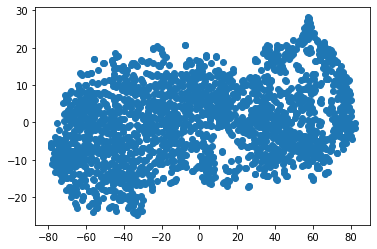

In [8]:
#表示学习与word2vec
min_count = 0
workers = 2
vector_size = 16
window = 10

w2v_model = train_w2v(total_measures, min_count=0, workers=2, vector_size=vector_size, window=10)
#root_w2v_model = train_w2v(combineds, epochs=75, min_count=0, workers=2, vector_size=vector_size, window=10)
pca_fig(w2v_model)

In [9]:
#探究word2vec在多少个epoch下效果最好
fontdict=dict(fontsize=16, family='Times New Roman', weight='light')
epochs=[1, 4, 8, 32]
mainfig = plt.figure(figsize=(10, 10))
for i, epoch in enumerate(epochs):
    test_w2v_model = train_w2v(combineds, epochs=epoch, min_count=0, workers=2, vector_size=64, window=10)
    all_words = test_w2v_model.wv.index_to_key
    all_vectors = []
    for word in all_words:
        all_vectors.append(test_w2v_model.wv[word])

    tsne = TSNE(n_components=2, init='pca', random_state=42)
    X_tsne = tsne.fit_transform(all_vectors)

    fig = plt.subplot(2, len(epochs)//2, i+1)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.8, s=10)
    fig.set_title('epochs={}'.format(epoch), fontdict=fontdict)
    for i, word in enumerate(all_words):
        if i == 10:
            break
    #给点打上标签
    #plt.annotate(word, xy=(X_tsne[i, 0], X_tsne[i, 1]))
    
mainfig.savefig('C:\\Users\\28056\\Desktop\\研究生\\文章\\word2vec.jpg', dpi=720, bbox_inches='tight', pad_inches=0)

NameError: name 'combineds' is not defined

<Figure size 720x720 with 0 Axes>

In [ ]:
print(combineds[0])
root_w2v_model.wv.most_similar(combineds[0][0])

In [ ]:
#假设以一个小节为一句话，预测之后的n个音，每个小节有20个音，每个音由64维向量表示
#那么每个小节的形状应该是(20，64)

In [13]:
def split_window(test):  
    x, y = tf.split(test, [15, 1], axis=2)
    return x, y

def measure2vector(measure, model):
    _ = np.zeros((1, vector_size))
    for pitch in measure:
        vec = model.wv.get_vector(pitch)
        _ = np.vstack((_, vec))
    _ = np.delete(_, 0, axis=0)   
    return _

def make_dataset(total_measures, model):
    total_vector = []
    for measure in total_measures:
        total_vector.append(measure2vector(measure, model=model))
    return total_vector

#root_dataset = make_dataset(combineds, model=root_w2v_model)
measure_dataset = make_dataset(total_measures, model=w2v_model)
#song_dataset = make_dataset(total_song_shifted, model=w2v_model)

In [14]:
print(len(measure_dataset))
#print(len(song_dataset))
print(measure_dataset[0].shape)

6434
(8, 16)


In [15]:
def split_Xy(dataset):
    Xset = [measure[:-1, :] for measure in dataset]
    yset = [measure[-1, :] for measure in dataset]
    X_train, X_test, y_train, y_test = train_test_split(Xset, yset, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

X_train_measure, X_test_measure, y_train_measure, y_test_measure = split_Xy(measure_dataset)
#X_train_song, X_test_song, y_train_song, y_test_song = split_Xy(song_dataset)

print('measure_train num:{}'.format(len(X_train_measure)))
print('X_train_measure shape:{}'.format(X_train_measure[0].shape))
print('y_train_measure shape:{}'.format(y_train_measure[0].shape))

print()
'''print('song_train num:{}'.format(len(X_train_song)))
print('X_train_song shape:{}'.format(X_train_song[0].shape))
print('y_train_song shape:{}'.format(y_train_song[0].shape))'''

measure_train num:5147
X_train_measure shape:(7, 16)
y_train_measure shape:(16,)



"print('song_train num:{}'.format(len(X_train_song)))\nprint('X_train_song shape:{}'.format(X_train_song[0].shape))\nprint('y_train_song shape:{}'.format(y_train_song[0].shape))"

In [18]:
X_train_measure = keras.preprocessing.sequence.pad_sequences(X_train_measure, maxlen=16, dtype='float32')
y_train_measure = np.array(y_train_measure)
print(X_train_measure.shape)
print(y_train_measure.shape)

(5147, 16, 16)
(5147, 16)


In [20]:
#采用只带旋律和根音的数据进行分割
X_train_root, X_test_root, y_train_root, y_test_root = split_Xy(measure_dataset)
#补0使长度一致
X_train_root = np.array(keras.preprocessing.sequence.pad_sequences(X_train_root, maxlen=16, dtype='float32'))
y_train_root = np.array(y_train_root)
X_test_root = np.array(keras.preprocessing.sequence.pad_sequences(X_test_root, maxlen=16, dtype='float32'))
y_test_root = np.array(y_test_root)

#对数据进行缩放 注意先对Xtrain缩放，然后用Xtrain缩放时的参数去缩放Xtest，而不是两个分着缩放
trainshape0, trainshape1, trainshape2 = X_train_root.shape[0], X_train_root.shape[1], X_train_root.shape[2]
testshape0, testshape1, testshape2 = X_test_root.shape[0], X_test_root.shape[1], X_test_root.shape[2]
X_train_root, X_test_root = X_train_root.reshape(-1, trainshape2), X_test_root.reshape(-1, testshape2) #先把batch的分隔打破
minmax = sklearn.preprocessing.MinMaxScaler()
minmax.fit(X_train_root)#用train的数据设置缩放器
X_train_root = minmax.transform(X_train_root).reshape(trainshape0, trainshape1, trainshape2)
X_test_root = minmax.transform(X_test_root).reshape(testshape0, testshape1, testshape2)

In [21]:
#再制作一份seq2seq的数据集。由于小节为单位太短，我们采用total_song制作数据集
X_train_seq = X_train_root[:, :8, :]
y_train_seq = np.concatenate((X_train_seq, y_train_root.reshape(y_train_root.shape[0], 1, -1)), axis=1)
print('X_train_root_seq.shape:{}'.format(X_train_root_seq.shape))
print('y_train_root_seq.shape:{}'.format(y_train_root_seq.shape))

NameError: name 'X_train_root_seq' is not defined

In [22]:
model = keras.models.Sequential([
    
    keras.layers.Masking(0),
    #keras.layers.LayerNormalization(epsilon=1e-6),
    keras.layers.LSTM(128, dropout=0.2, input_shape=[None, vector_size], return_sequences=True),
    keras.layers.LSTM(128,dropout=0.2),
    keras.layers.Dense(16)                          
])

optimizer = keras.optimizers.Adam(
    learning_rate=0.001, 
    beta_1=0.9, 
    beta_2=0.999, 
    epsilon=None, 
    decay=0.0, 
    amsgrad=False
)
model.compile(loss='mae', 
              optimizer=optimizer, 
              metrics=keras.metrics.CosineSimilarity(
                  name="cosine_similarity", dtype=None, axis=-1)
)

history = model.fit(
    X_train_root,
    y_train_root, 
    validation_split=0.1, batch_size=128, epochs=50
)

Epoch 1/50
37/37 [==============================] - 17s 87ms/step - loss: 0.5831 - cosine_similarity: 0.7012 - val_loss: 0.5307 - val_cosine_similarity: 0.7604
Epoch 2/50
37/37 [==============================] - 0s 9ms/step - loss: 0.5451 - cosine_similarity: 0.7569 - val_loss: 0.5187 - val_cosine_similarity: 0.7666
Epoch 3/50
37/37 [==============================] - 0s 10ms/step - loss: 0.5309 - cosine_similarity: 0.7709 - val_loss: 0.4992 - val_cosine_similarity: 0.7890
Epoch 4/50
37/37 [==============================] - 0s 10ms/step - loss: 0.5208 - cosine_similarity: 0.7823 - val_loss: 0.5010 - val_cosine_similarity: 0.7948
Epoch 5/50
37/37 [==============================] - 0s 12ms/step - loss: 0.5164 - cosine_similarity: 0.7864 - val_loss: 0.4863 - val_cosine_similarity: 0.8057
Epoch 6/50
37/37 [==============================] - 0s 9ms/step - loss: 0.5122 - cosine_similarity: 0.7899 - val_loss: 0.4828 - val_cosine_similarity: 0.8093
Epoch 7/50
37/37 [=============================

In [1]:
seq_model = model = keras.models.Sequential([
    
    keras.layers.Masking(0),
    keras.layers.LSTM(128, dropout=0.2, input_shape=[None, vector_size], return_sequences=True),
    keras.layers.LSTM(128,dropout=0.2, return_sequences=True),
    keras.layers.Dense(16)                          
])

NameError: name 'keras' is not defined

In [30]:
for i in range(X_test_root.shape[0]):
    pre_vec = model.predict(X_test_root[i:i+1])
    print(root_w2v_model.wv.most_similar(pre_vec, topn=2))

[('4G', 0.9652325510978699), ('4A 4D', 0.91848224401474)]
[('4G', 0.9157605171203613), ('3B', 0.9026829600334167)]
[('5D#', 0.9211618900299072), ('5B 3E', 0.9186226725578308)]
[('4G', 0.97049880027771), ('4B', 0.9121203422546387)]
[('4G', 0.9541021585464478), ('4A 4D', 0.934537947177887)]
[('4G', 0.955259382724762), ('4A 4D', 0.9274164438247681)]
[('4A 4D', 0.9518109560012817), ('4C 3G', 0.9399943351745605)]
[('4B', 0.9524208307266235), ('4G', 0.9511470794677734)]
[('5E 4C#', 0.9420526027679443), ('5D#', 0.9409429430961609)]
[('5D#', 0.9211618900299072), ('5B 3E', 0.9186226725578308)]
[('4G', 0.9668970704078674), ('4B', 0.9306294322013855)]
[('4G', 0.9707449674606323), ('4A 4D', 0.9031718373298645)]
[('4A 4D', 0.9587428569793701), ('4C 3G', 0.9349260926246643)]
[('5C 3C', 0.9369444251060486), ('4B 3E', 0.9242631196975708)]
[('4A 4D', 0.9223321080207825), ('5D#', 0.9193121790885925)]
[('4A 4D', 0.9520974159240723), ('4B', 0.9308961033821106)]
[('4B', 0.9694172143936157), ('4A 4D', 0.939

In [33]:
m = keras.metrics.CosineSimilarity()
for i in range(10):
    pre_vec1 = model.predict(X_test_root[i:i+1])
    true_vec1 = y_test_root[i]
    m.update_state(pre_vec1[0], true_vec1)
    print(m.result().numpy())
    print(pre_vec1)
    print()

0.9652324
[[ 0.36501428  0.11265557  0.08273029  0.87141794  0.23428823  0.22405964
   1.4649936   0.16391097  0.17647903 -0.03475716 -0.14805356  0.3113905
  -0.19414093 -0.21769193 -0.10438901 -0.1276774 ]]

0.8641914
[[ 0.22884429  0.20803061  0.25139505  0.6026938   0.25139996  0.13303402
   1.5365936   0.1656696   0.16521794  0.23546754 -0.01567635  0.35371253
  -0.19197148 -0.25105575 -0.07356051 -0.0367391 ]]

0.82765585
[[-0.00522109  0.30158317  0.2851447   0.46998143  0.30037156  0.1025577
   1.6424303   0.22414248  0.23291321  0.04742525 -0.02944528  0.4910171
   0.06163347 -0.22919656 -0.21434611 -0.01957549]]

0.8633666
[[ 0.42335454  0.10931814  0.08876984  0.8887121   0.23681168  0.23952074
   1.5184126   0.15791984  0.1779731   0.0126417  -0.14156094  0.31585872
  -0.23908047 -0.23502785 -0.07003792 -0.11640467]]

0.84083855
[[ 0.30971462  0.10182077  0.10999569  0.8962137   0.17287645  0.23510279
   1.4046706   0.1547895   0.19066817 -0.05775325 -0.14108554  0.2493857


In [35]:
y_pred = model.predict(X_test_root)
for i in range(10):
    pred_pitch = root_w2v_model.wv.most_similar([y_pred[i]], topn=3)
    truth_pitch = root_w2v_model.wv.most_similar([y_test_root[i]], topn=1)
    print('true pitch:{}\npred pitch:{}'.format(truth_pitch, pred_pitch))
    print('===================')

true pitch:[('4G', 1.0000001192092896)]
pred pitch:[('4G', 0.9652325510978699), ('4A 4D', 0.9184820652008057), ('4B', 0.9125927686691284)]
true pitch:[('4F', 1.0)]
pred pitch:[('4G', 0.9157605171203613), ('3B', 0.9026829600334167), ('5D#', 0.8988034129142761)]
true pitch:[('5C', 0.9999998807907104)]
pred pitch:[('5D#', 0.9211618900299072), ('5B 3E', 0.9186226725578308), ('4C', 0.9136161208152771)]
true pitch:[('4G', 1.0000001192092896)]
pred pitch:[('4G', 0.97049880027771), ('4B', 0.9121203422546387), ('4A 4D', 0.912056565284729)]
true pitch:[('5D', 1.0)]
pred pitch:[('4G', 0.9541021585464478), ('4A 4D', 0.934537947177887), ('4B', 0.9237110018730164)]
true pitch:[('5C', 0.9999998807907104)]
pred pitch:[('4G', 0.955259382724762), ('4A 4D', 0.9274164438247681), ('3E', 0.903874397277832)]
true pitch:[('4G', 1.0000001192092896)]
pred pitch:[('4A 4D', 0.9518109560012817), ('4C 3G', 0.9399943351745605), ('5D#', 0.9333414435386658)]
true pitch:[('4B', 1.0)]
pred pitch:[('4B', 0.95242083072662

In [74]:
#接下来测试GPT2的效果
import transformers
f = open('shakespeare2.txt','r', encoding='UTF-8')
shakespeare_text = f.read()

tokenizer = keras.preprocessing.text.Tokenizer(char_level=True)  #char_level代表字符级，每一个字符做映射
tokenizer.fit_on_texts([shakespeare_text])
[encoded] = np.array(tokenizer.texts_to_sequences([shakespeare_text])) - 1

In [52]:
encoded = np.array(encoded[:128000]).reshape(128, -1)

In [1]:
sp_dataset = tf.dataset.from_tensor_slice(encoded)

NameError: name 'tf' is not defined

In [54]:
from transformers import GPT2Config
#定义一下模型参数
config = GPT2Config(
    architectures=["TFGPT2LMHeadModel"],   # pretrain的时候用来预加载模型
    vocab_size=8021,
    n_positions=1024,
    n_ctx=1024,
    n_embd=768,
    n_layer=6,
    n_head=6,
    pad_token_id=0,   # 前面构建的tokenizer的 PAD ID
    task_specific_params={
        "text-generation": {
            "do_sample": True,
            "max_length": 120
        }
    }
)

from transformers import TFGPT2LMHeadModel
model = TFGPT2LMHeadModel(config)
loss = model.compute_loss
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5, epsilon=1e-08)

model.compile(
    optimizer=optimizer,
    loss=[loss, *[None] * model.config.n_layer],
)



model.fit([encoded])

TypeError: in user code:

    F:\ProgramData\Anaconda3\envs\transformer2\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    F:\ProgramData\Anaconda3\envs\transformer2\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\28056\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\28056\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\28056\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    F:\ProgramData\Anaconda3\envs\transformer2\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    F:\ProgramData\Anaconda3\envs\transformer2\lib\site-packages\transformers\modeling_tf_utils.py:882 train_step
        if y is None and "labels" in x:
    C:\Users\28056\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\28056\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\ops\math_ops.py:1935 tensor_equals
        self, other = maybe_promote_tensors(self, other)
    C:\Users\28056\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\ops\math_ops.py:1335 maybe_promote_tensors
        ops.convert_to_tensor(tensor, dtype, name="x"))
    C:\Users\28056\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\profiler\trace.py:163 wrapped
        return func(*args, **kwargs)
    C:\Users\28056\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\framework\ops.py:1566 convert_to_tensor
        ret = conversion_func(value, dtype=dtype, name=name, as_ref=as_ref)
    C:\Users\28056\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\framework\constant_op.py:346 _constant_tensor_conversion_function
        return constant(v, dtype=dtype, name=name)
    C:\Users\28056\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\framework\constant_op.py:271 constant
        return _constant_impl(value, dtype, shape, name, verify_shape=False,
    C:\Users\28056\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\framework\constant_op.py:288 _constant_impl
        tensor_util.make_tensor_proto(
    C:\Users\28056\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\framework\tensor_util.py:457 make_tensor_proto
        _AssertCompatible(values, dtype)
    C:\Users\28056\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\framework\tensor_util.py:336 _AssertCompatible
        raise TypeError("Expected %s, got %s of type '%s' instead." %

    TypeError: Expected int32, got 'labels' of type 'str' instead.


In [108]:
from tokenizers import BertWordPieceTokenizer

tokenizer = BertWordPieceTokenizer()
tokenizer.train_from_iterator(shakespeare_text,
                vocab_size=52_000, min_frequency=5)
tokenizer.save_model('C:\\Users\\28056\\Desktop\\研究生\\音乐生成')

['C:\\Users\\28056\\Desktop\\研究生\\音乐生成\\vocab.txt']

In [106]:
tokenizer = BertTokenizer.from_pretrained('C:\\Users\\28056\\Desktop\\研究生\\音乐生成')

In [107]:
tokenizer('a b c d e f g h i j k l m n')['input_ids']

[2, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 3]

In [111]:
help(tokenizer.train_from_iterator)

Help on method train_from_iterator in module tokenizers.implementations.bert_wordpiece:

train_from_iterator(iterator: Union[Iterator[str], Iterator[Iterator[str]]], vocab_size: int = 30000, min_frequency: int = 2, limit_alphabet: int = 1000, initial_alphabet: List[str] = [], special_tokens: List[Union[str, tokenizers.AddedToken]] = ['[PAD]', '[UNK]', '[CLS]', '[SEP]', '[MASK]'], show_progress: bool = True, wordpieces_prefix: str = '##') method of tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer instance
    Train the model using the given iterator



In [70]:
tokenizer.decode(logits.numpy())

TypeError: int() argument must be a string, a bytes-like object or a number, not 'list'